# Preprocessing

In [5]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%autoreload 2

In [7]:
import torch

In [8]:
from src.vfm.connection import Connection
from src.vfm.preprocessor import Preprocessor
from src.vfm.resampler import Resampler
from src.utils.descriptive_utils import *
from src.vfm.model.physics.physics_informed import PhysicsInformedHybridModel
from src.utils import *

In [9]:
connection = Connection()
# Get client
client = connection.get_client()

In [10]:
df_all_wells = connection.get_data(client, wells=get_all_wells())
df_all_wells.columns

Index(['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test',
       'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm',
       'well_id'],
      dtype='object')

In [11]:
dependent_vars=get_depdendent_vars()
independent_vars=get_independent_vars()

In [12]:
preprocessor = Preprocessor()
df_all_wells_preprocessed = preprocessor.preprocess_wells(df=df_all_wells)
len(df_all_wells_preprocessed)

Preprocessing well W06 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W08 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W10 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W11 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W15 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W18 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mp

729

In [13]:
summarize_null(df_all_wells_preprocessed)

qo_mpfm      0
qg_mpfm      0
qw_mpfm      0
well_code    0
dhp          0
dht          0
whp          0
wht          0
choke        0
dcp          0
well_id      0
wc_mpfm      0
time_idx     0
dtype: int64

In [14]:
df_train, df_val, df_test = get_random_train_test_split_per_well_with_order_preserved(df=df_all_wells_preprocessed, test_size=0.2)
len(df_train), len(df_val), len(df_test)

(517, 65, 147)

In [15]:
model = PhysicsInformedHybridModel(dependant_vars=dependent_vars, independent_vars=independent_vars)
model.fit(df=df_train, df_val=df_val)

[Validation] Residual RMSE = 0.3874


In [16]:
model.score_physics(df_test)

{'W06': {'qo': {'r2': 0.4020784575406988,
   'mae': 25.807648417431064,
   'rmse': 32.00193476502264,
   'mape (%)': 37.22620049757568,
   'mpe (%)': 28.675479885195127},
  'qw': {'r2': 0.023276830585226227,
   'mae': 0.15733378930764638,
   'rmse': 0.19008514720321665,
   'mape (%)': 125923.21317515027,
   'mpe (%)': 125891.82975563045},
  'qg': {'r2': 0.8368326487886288,
   'mae': 1727.2060149052559,
   'rmse': 2093.0848121180693,
   'mape (%)': 14.244203938103084,
   'mpe (%)': -3.511063321663858},
  'wgr': {'r2': -3.0670368099513254,
   'mae': 1.6490188395517444e-05,
   'rmse': 1.7332042111930838e-05,
   'mape (%)': 104.07708900641921,
   'mpe (%)': -7.17133406792787},
  'gor': {'r2': -34.96580076145355,
   'mae': 22.043653111538944,
   'rmse': 37.22998758849282,
   'mape (%)': 17.278153536196047,
   'mpe (%)': -15.431730446499525}},
 'W08': {'qo': {'r2': -0.242725069595624,
   'mae': 7.005948676081753,
   'rmse': 8.899236834863515,
   'mape (%)': 44.275339636871976,
   'mpe (%)': 

In [17]:
model.score_hybrid(df_test)

{'W06': {'qo': {'r2': 0.8697206640641166,
   'mae': 12.265942031588295,
   'rmse': 14.937981018549216,
   'mape (%)': 12.488012564545333,
   'mpe (%)': 4.093716025046375},
  'qw': {'r2': -0.2795342867412891,
   'mae': 0.1016904058839961,
   'rmse': 0.21756468506374765,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'qg': {'r2': 0.8869929522525809,
   'mae': 1197.815615876167,
   'rmse': 1741.8989578417836,
   'mape (%)': 11.284142010677435,
   'mpe (%)': 6.494441414866442},
  'wgr': {'r2': -5.987413405374665,
   'mae': 2.1029565840740096e-05,
   'rmse': 2.27179376552799e-05,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'gor': {'r2': -5.33327274494007,
   'mae': 11.40134479268396,
   'rmse': 15.62291680723423,
   'mape (%)': 9.08211986022066,
   'mpe (%)': 2.860593920214399}},
 'W08': {'qo': {'r2': 0.48509383966187225,
   'mae': 4.121348273132959,
   'rmse': 5.728346485885785,
   'mape (%)': 26.442271293191993,
   'mpe (%)': 18.398984545132407},
  'qw': {'r2': 0.8852157358603135,
   '

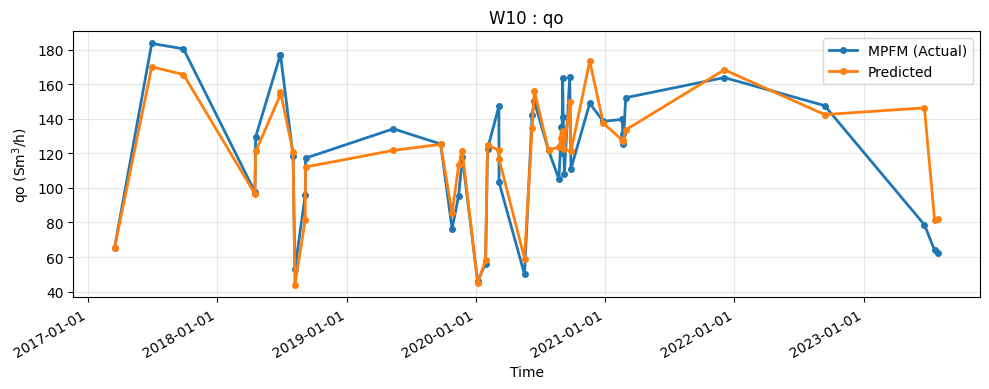

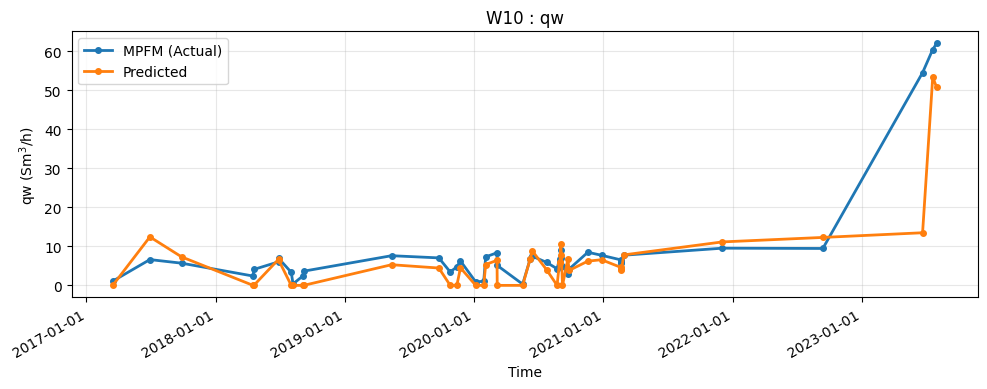

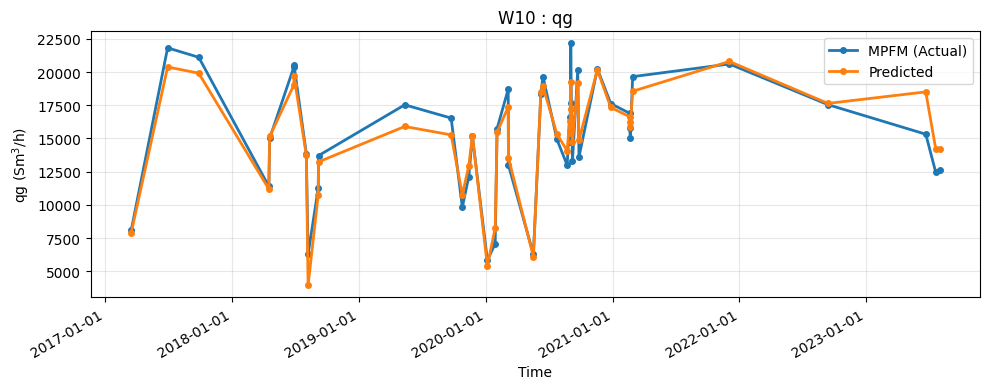

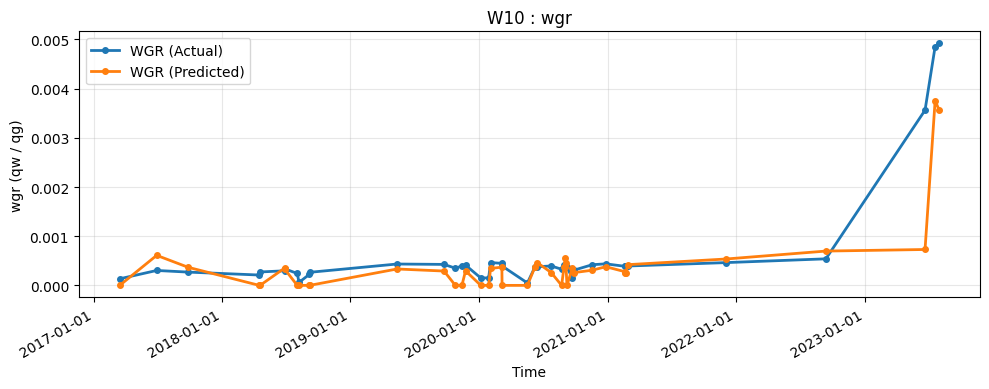

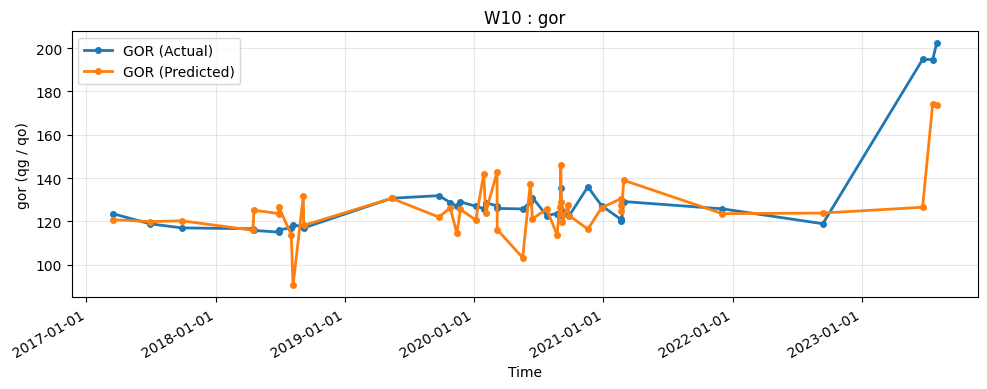

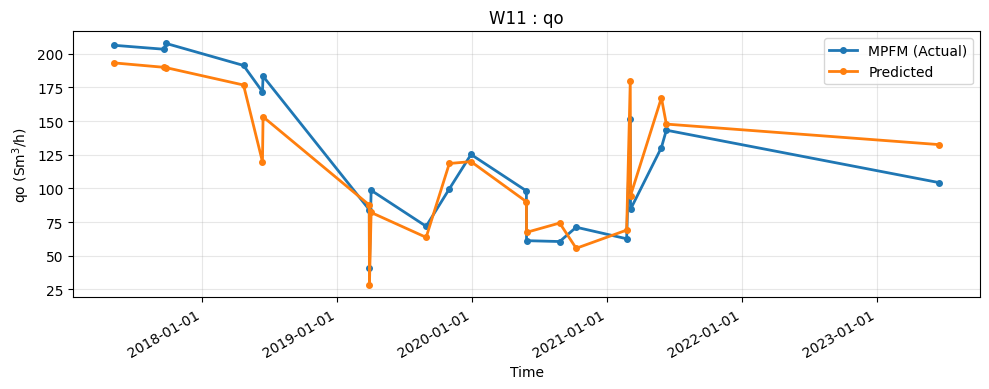

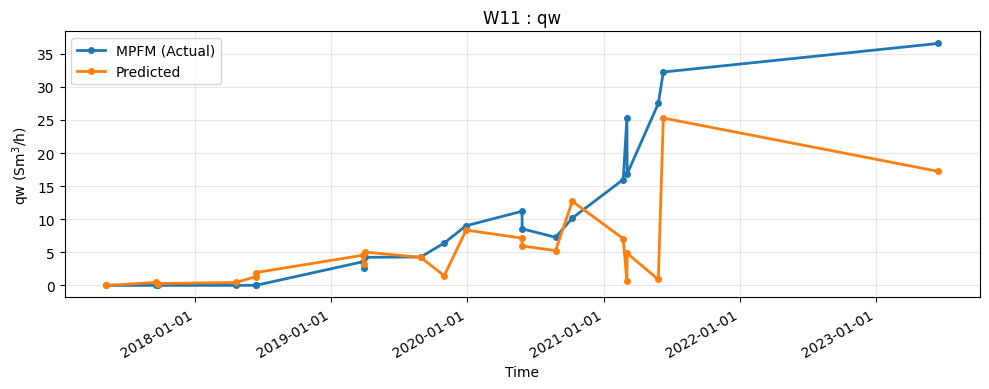

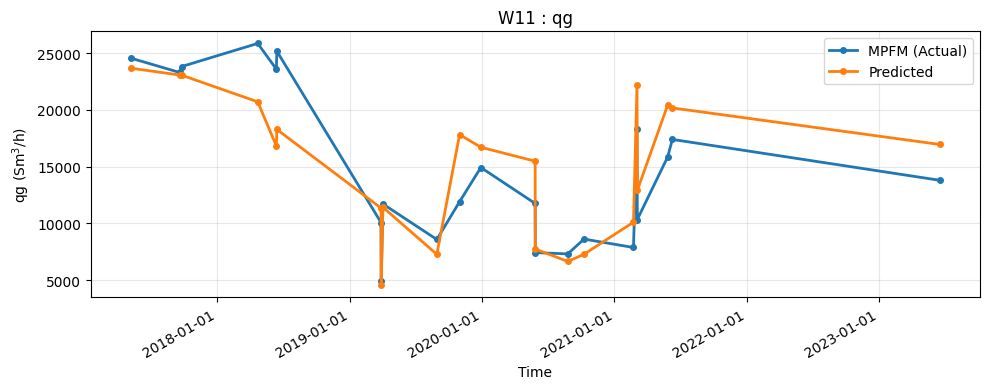

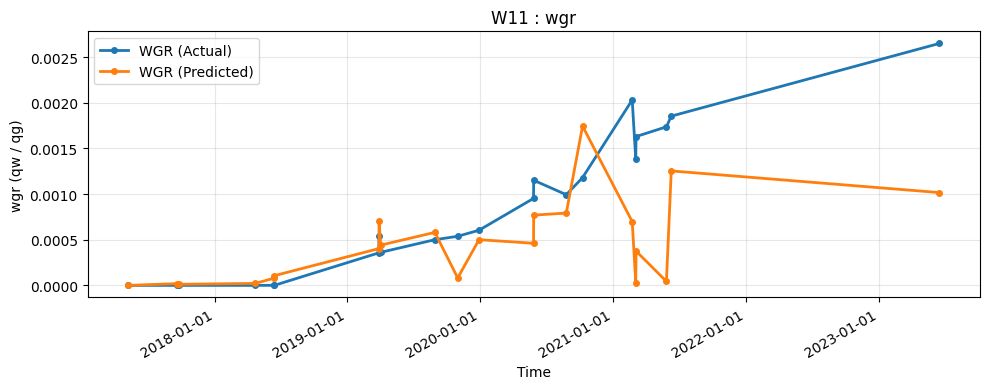

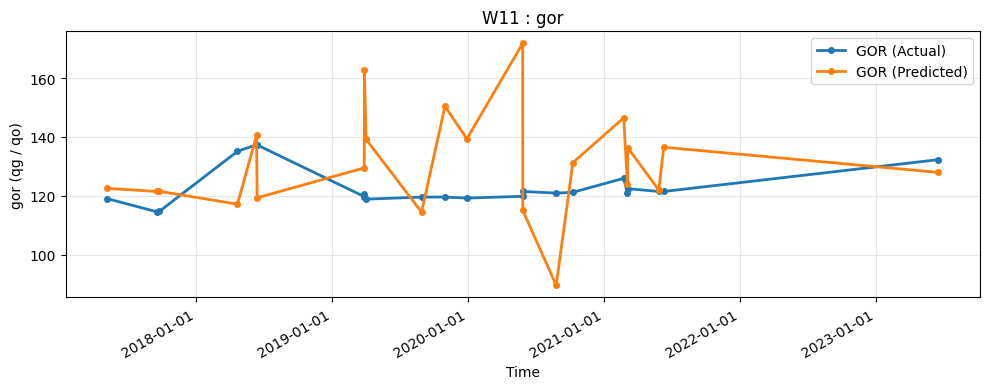

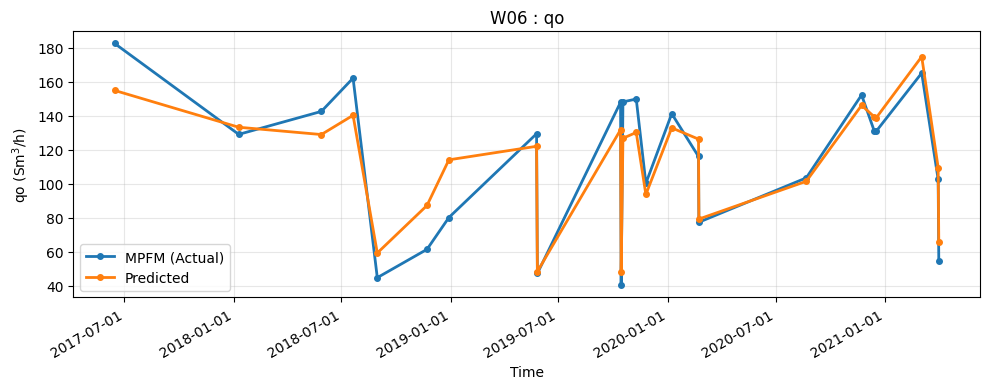

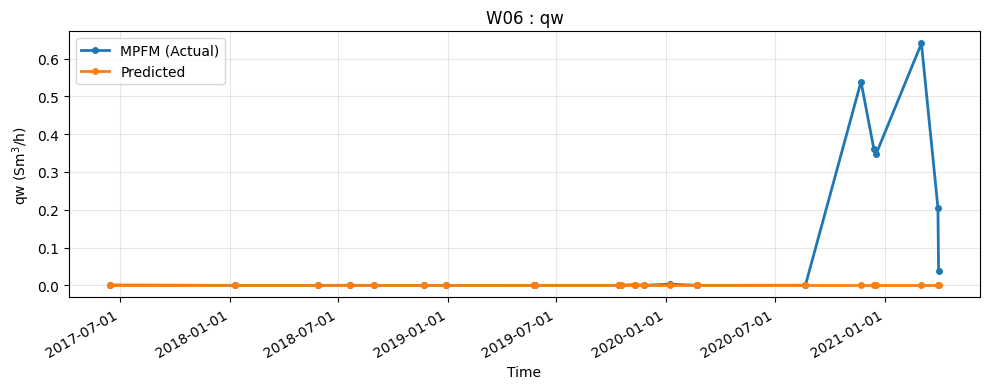

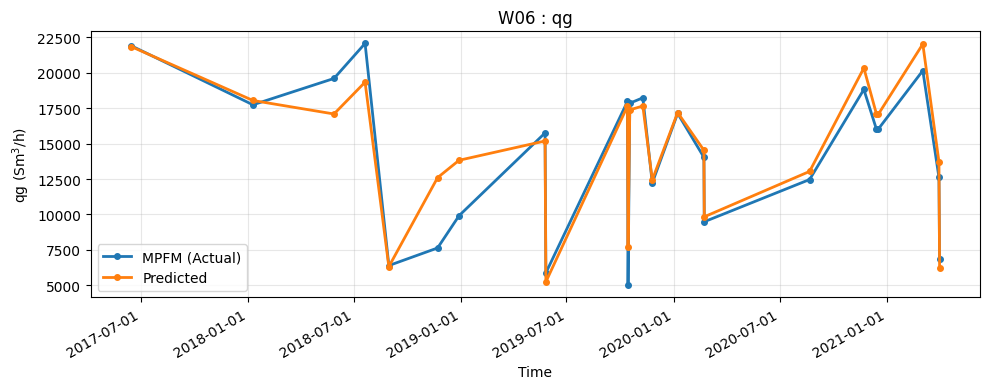

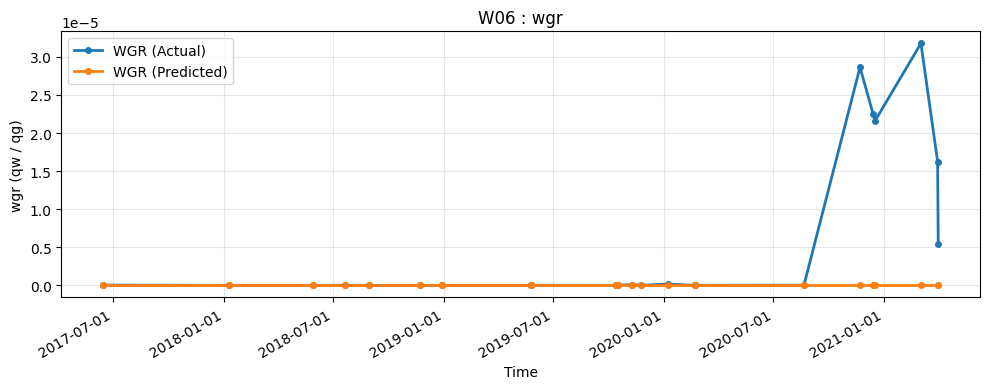

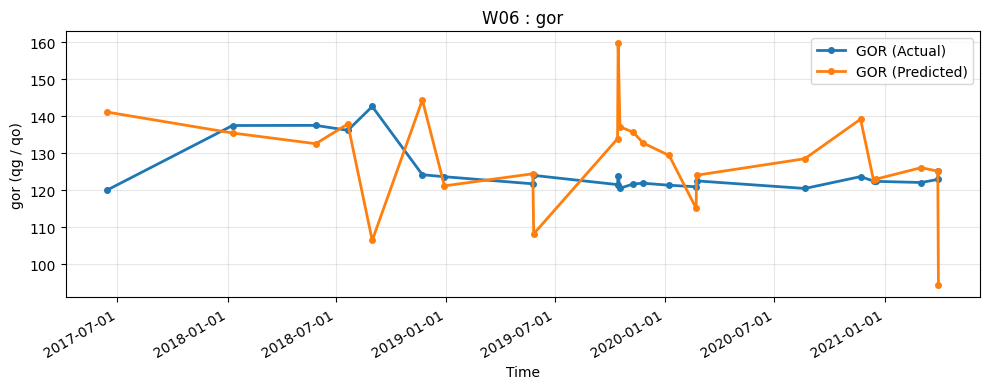

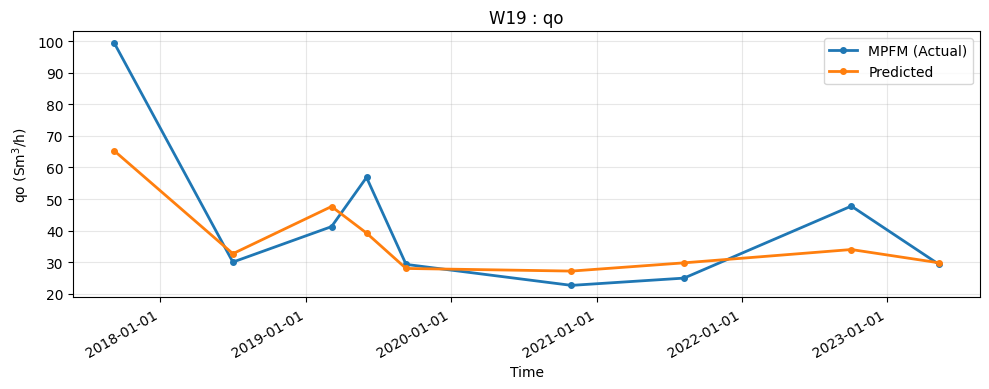

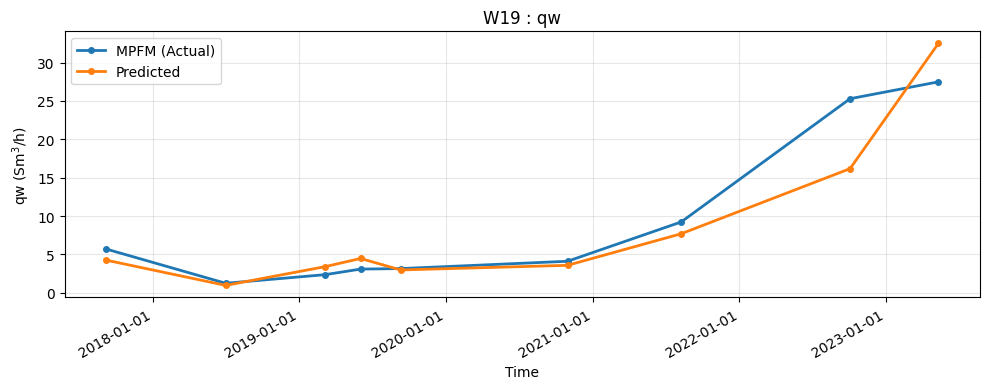

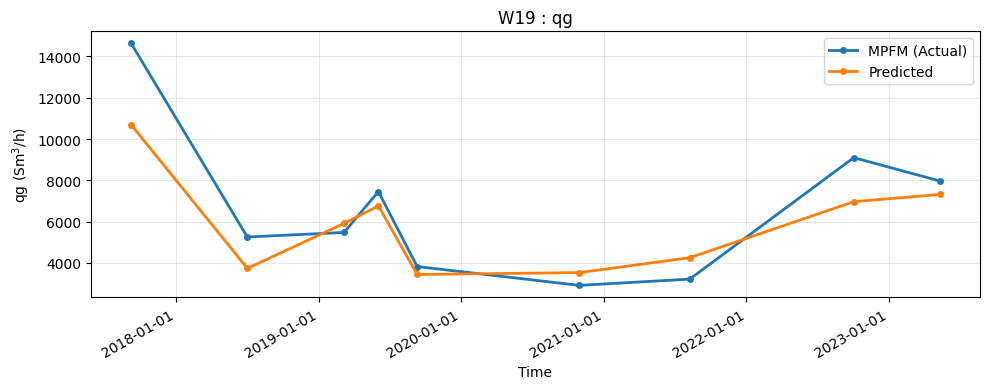

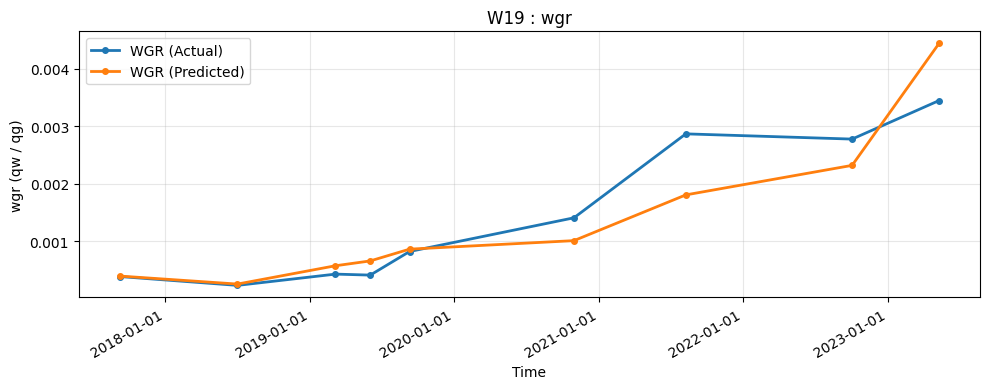

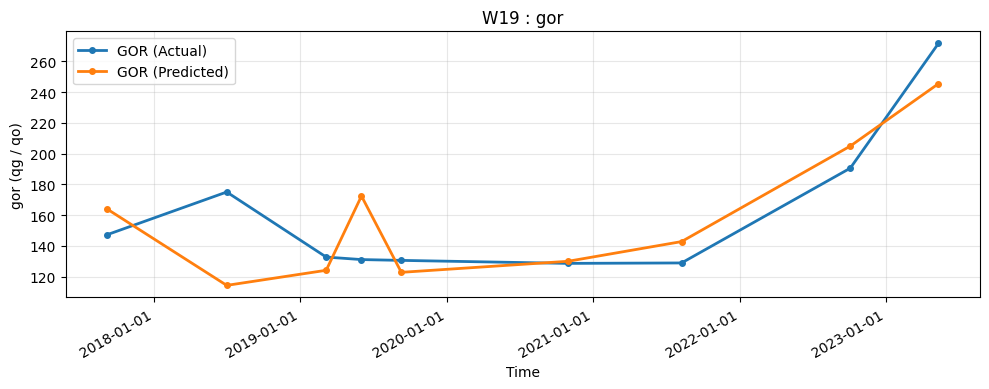

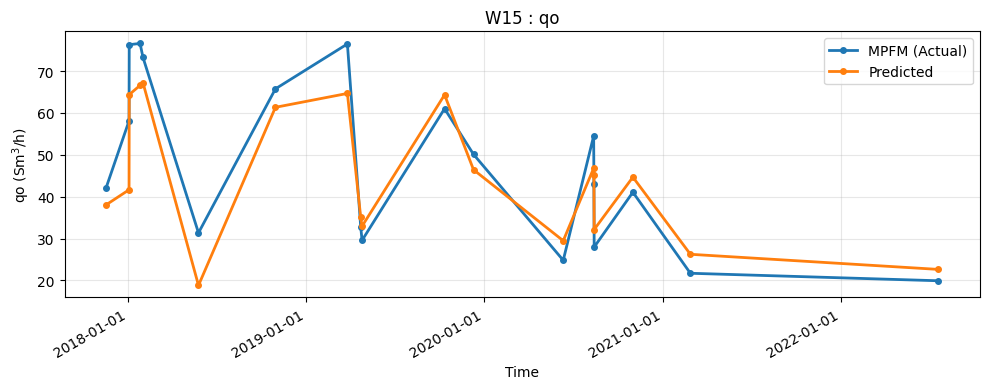

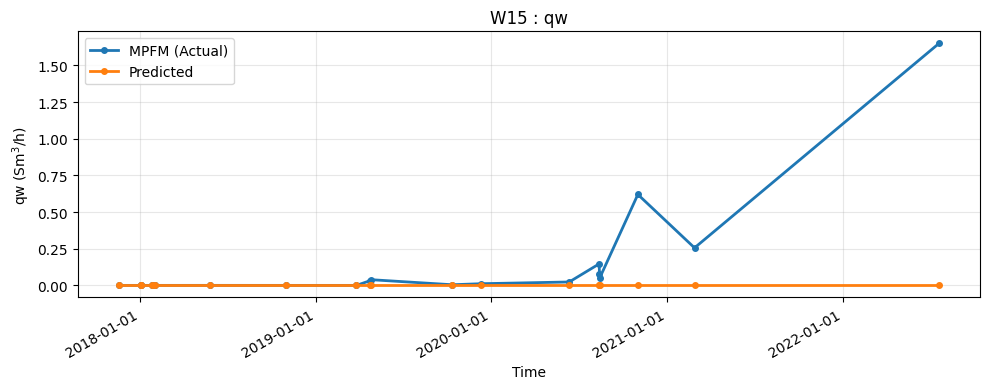

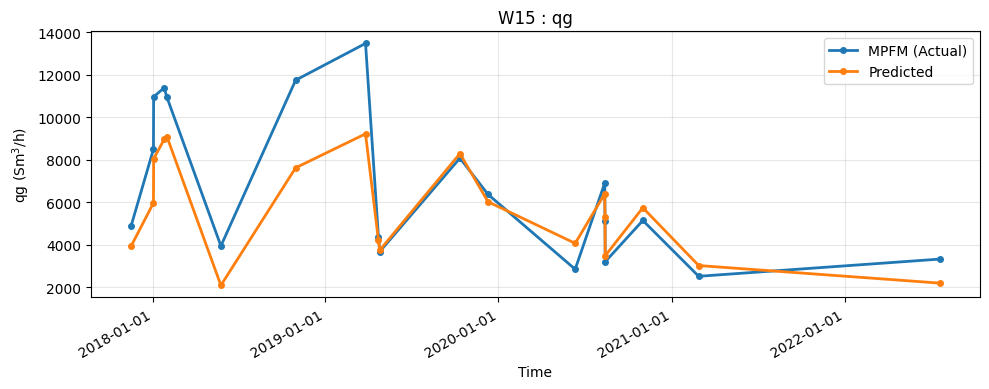

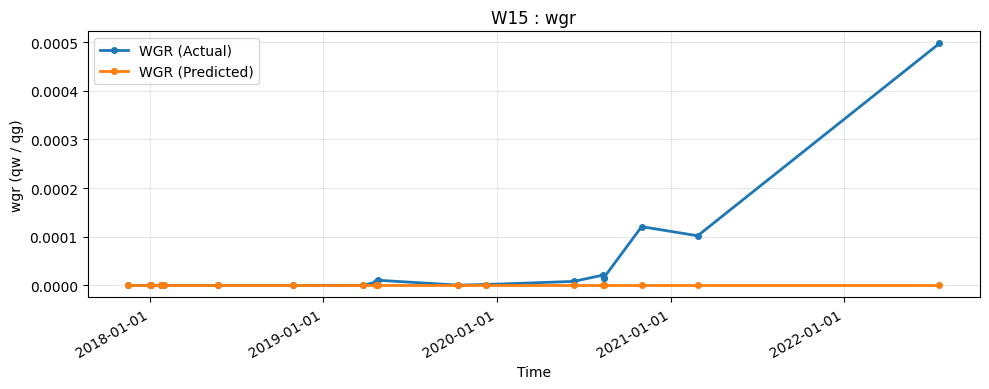

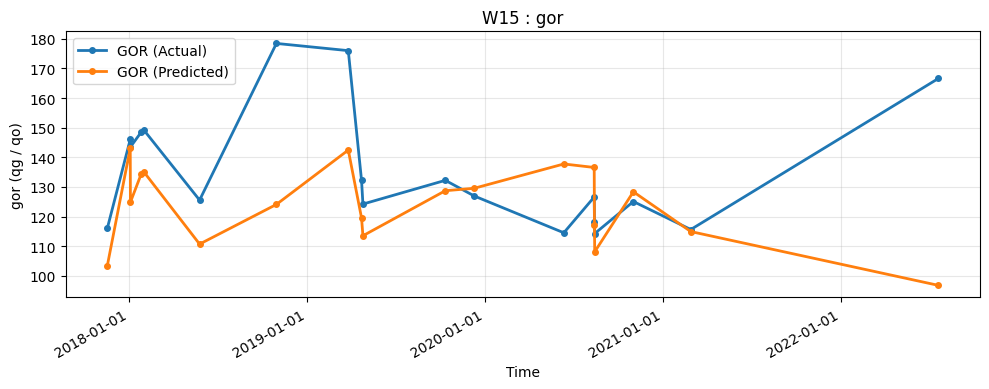

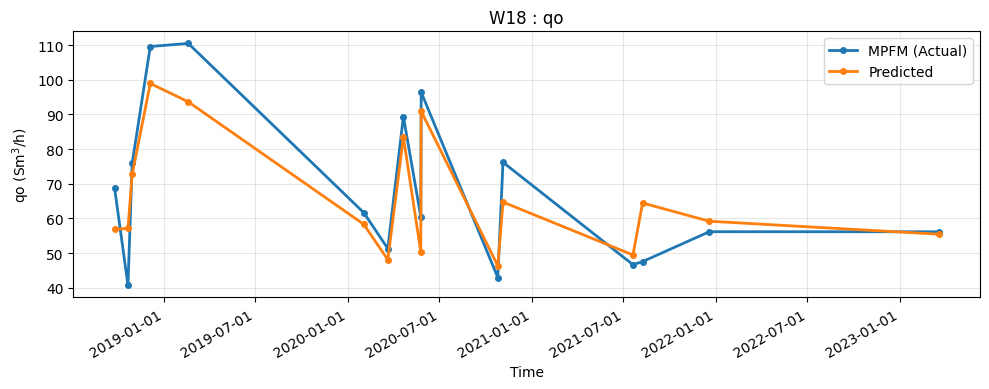

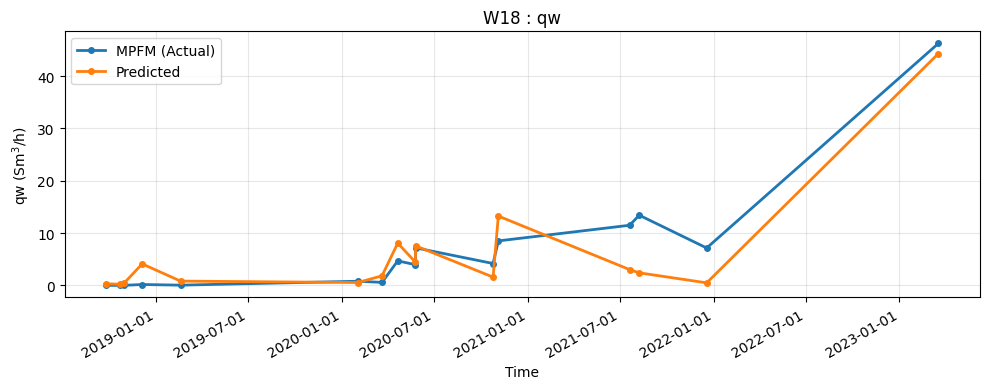

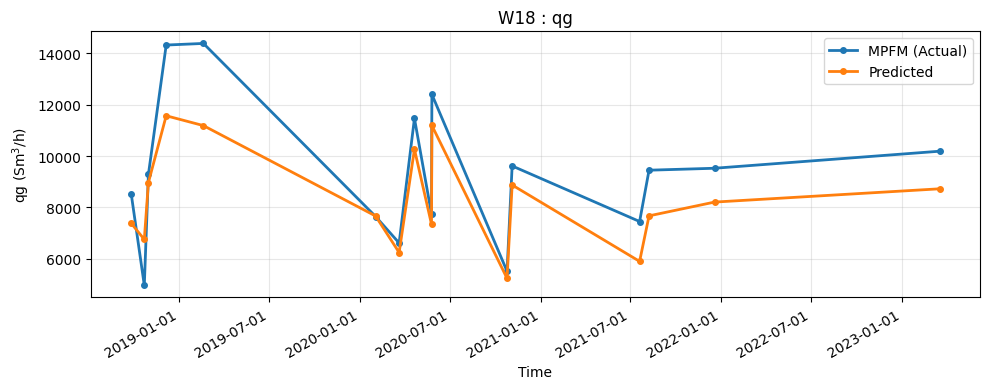

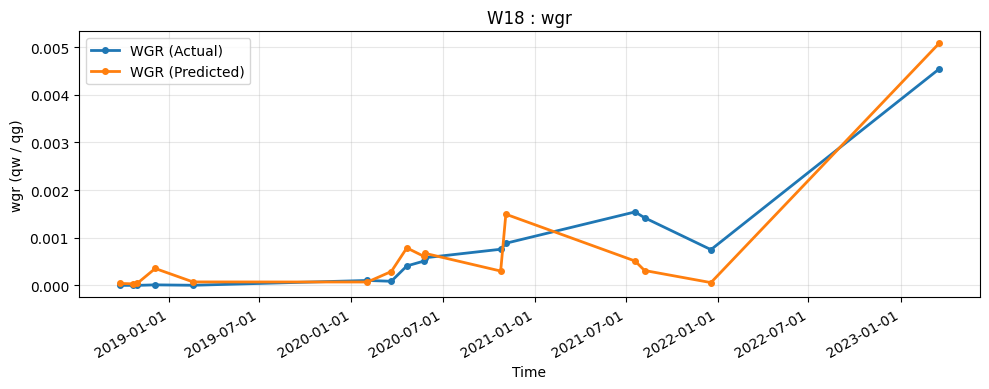

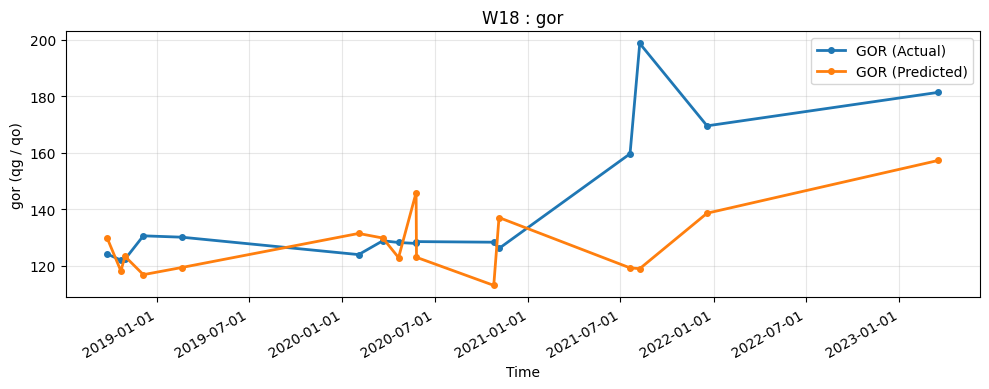

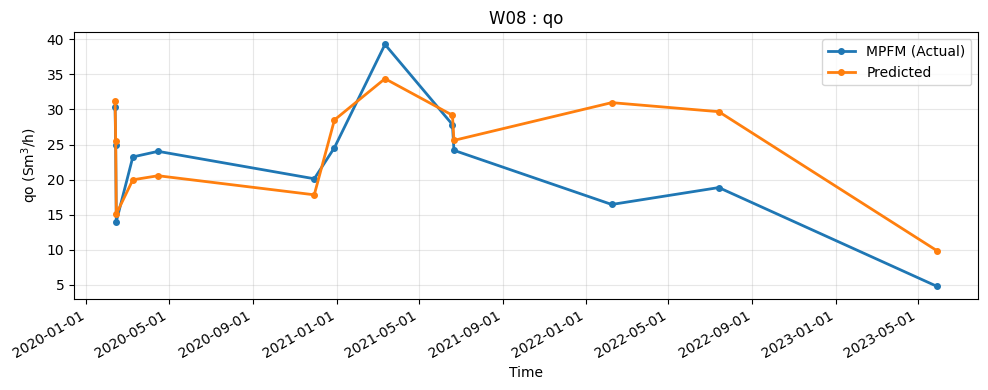

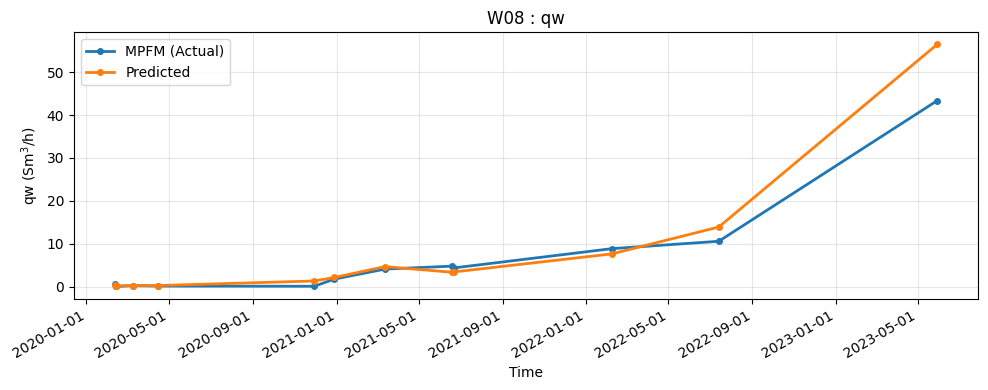

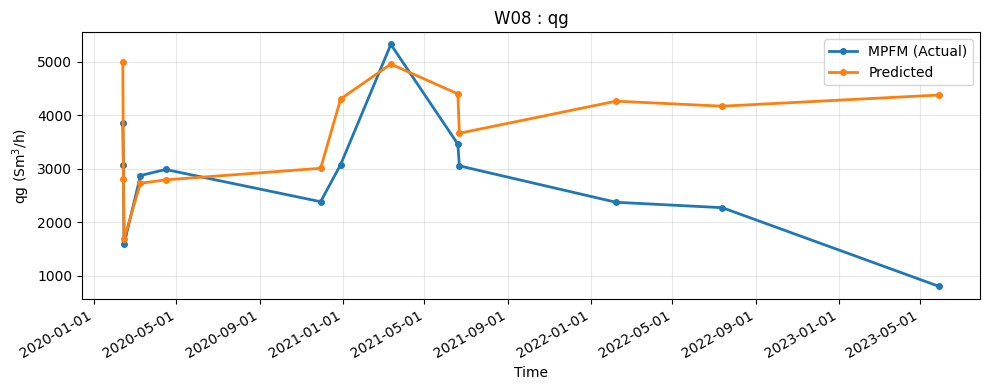

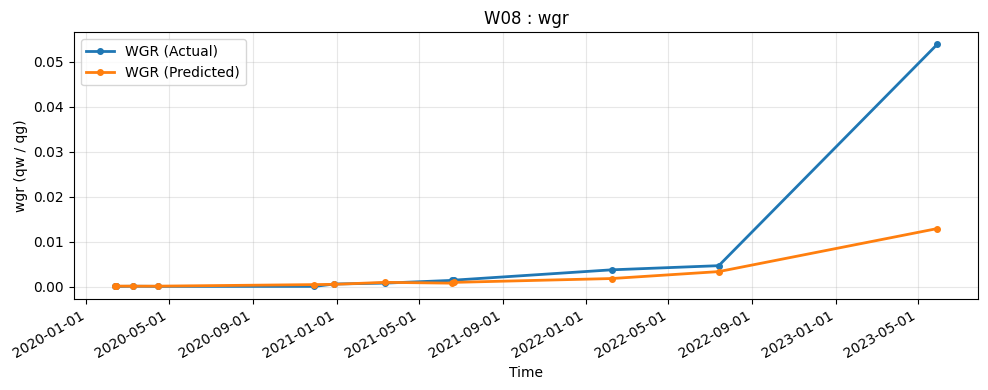

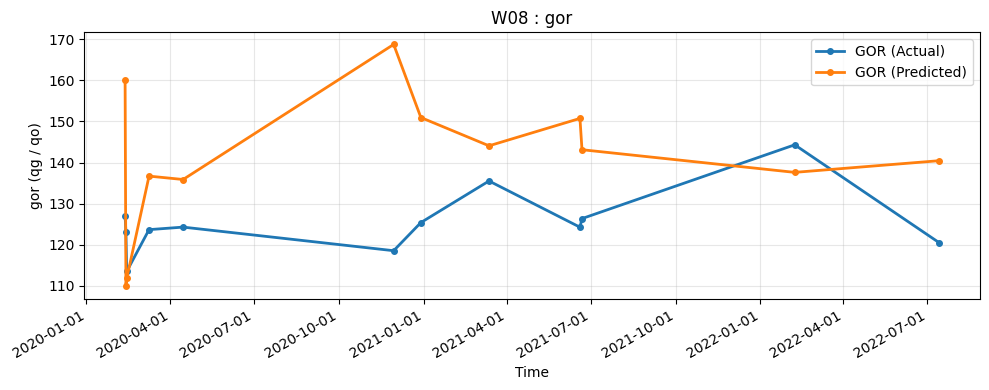

In [18]:
model.plot_predictions(df=df_test, is_hybrid_model=True)

### Resample and interpolate

In [19]:
resampler = Resampler()
df_resampled = resampler.resample_wells(df=df_all_wells_preprocessed, independent_vars=independent_vars)
print(summarize_null(df=df_resampled))
print(df_resampled.shape)

choke                0
whp                  0
dcp                  0
dhp                  0
wht                  0
dht                  0
well_code            0
qo_mpfm        2054244
qg_mpfm        2054244
qw_mpfm        2054244
wc_mpfm        2054244
time_idx             0
is_observed          0
well_id              0
dtype: int64
(2054973, 14)


In [20]:
df_resampled.index

RangeIndex(start=0, stop=2054973, step=1)

In [21]:
df_resampled.columns

Index(['choke', 'whp', 'dcp', 'dhp', 'wht', 'dht', 'well_code', 'qo_mpfm',
       'qg_mpfm', 'qw_mpfm', 'wc_mpfm', 'time_idx', 'is_observed', 'well_id'],
      dtype='object')

In [22]:
df_resampled[df_resampled["is_observed"] == 1].shape

(729, 14)

In [23]:
# Monotonic
df_resampled.groupby("well_id")["time_idx"].is_monotonic_increasing

well_id
W06    True
W08    True
W10    True
W11    True
W15    True
W18    True
W19    True
Name: time_idx, dtype: bool

In [24]:
df_generated = model.generate_dense_well_rates(df=df_resampled)

In [25]:
df_generated

,choke,whp,dcp,dhp,wht,dht,well_code,qo_mpfm,qg_mpfm,qw_mpfm,wc_mpfm,time_idx,is_observed,well_id
0,0.528083,41.730152,21.704721,140.802737,61.559255,81.667259,0.0,113.107685,13173.310831,0.157657,0.139193,14614,1,W06
1,5.000000,41.730152,21.704721,140.802737,61.560502,81.668032,0.0,138.384205,17809.752776,0.000000,NaN,14617,0,W06
2,5.000000,41.709088,21.767067,140.777550,61.561753,81.670788,0.0,138.428261,18017.838564,0.000000,NaN,14637,0,W06
3,5.000000,41.736919,21.774499,140.752228,61.562976,81.676227,0.0,138.466444,18018.583335,0.000000,NaN,14657,0,W06
4,5.000000,41.792113,21.807497,140.731699,61.561134,81.673141,0.0,138.499233,18019.187083,0.000000,NaN,14677,0,W06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054968,100.000000,0.157048,6.593723,98.240011,58.242571,79.513772,6.0,0.000000,9547.506398,46.323678,NaN,6738217,0,W19
2054969,100.000000,0.123440,6.482510,98.234219,58.247681,79.512031,6.0,0.000000,9547.613595,46.326475,NaN,6738237,0,W19
2054970,100.000000,0.083814,6.521116,98.234640,58.248807,79.513797,6.0,0.000000,9547.605813,46.326272,NaN,6738257,0,W19
2054971,0.870000,23.714792,20.734004,97.135123,59.003958,79.395365,6.0,28.037388,8919.588673,29.365769,51.157062,6738258,1,W19


In [26]:
summarize_null(df_generated)

choke                0
whp                  0
dcp                  0
dhp                  0
wht                  0
dht                  0
well_code            0
qo_mpfm              0
qg_mpfm              0
qw_mpfm              0
wc_mpfm        2054244
time_idx             0
is_observed          0
well_id              0
dtype: int64